In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [121]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Basic EDA - Statistical Analysis

In [122]:
df.shape

(5000, 7)

In [123]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [125]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [126]:
df[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [127]:
df.rename(columns={'Avg. Area Income':'Area Income', 'Avg. Area House Age':'House Age',
                  'Avg. Area Number of Rooms':'Number of Rooms',
                  'Avg. Area Number of Bedrooms': 'Number of Bedrooms'}, inplace=True)

In [128]:
df.head()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Missing Values

In [129]:
df.isnull().sum()

Area Income           0
House Age             0
Number of Rooms       0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
dtype: int64

# Duplicate Values

In [130]:
df.duplicated().sum()

0

In [131]:
df[df.duplicated()]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address


# Outliers/Anomalies Detection

In [132]:
df[:3]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


## Using Boxplot

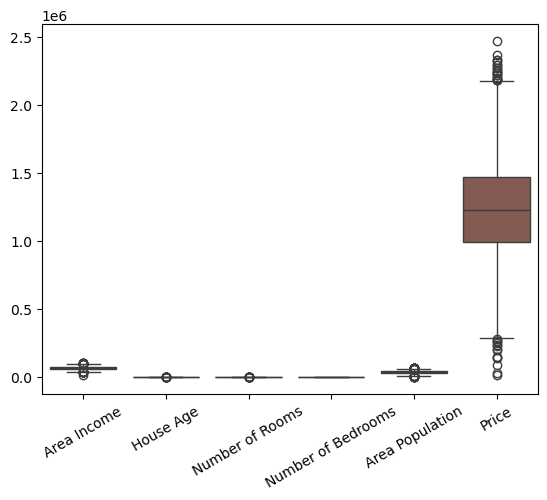

In [133]:
sns.boxplot(df)
plt.xticks(rotation=30)
plt.show()

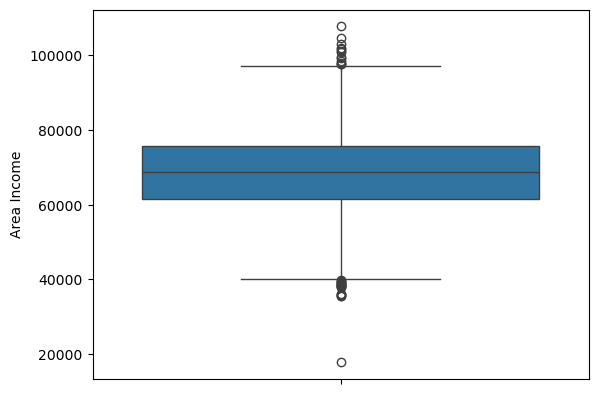

In [134]:
sns.boxplot(df['Area Income'])
plt.show()

In [135]:
df.columns

Index(['Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

-------------------------Area Income-------------------------


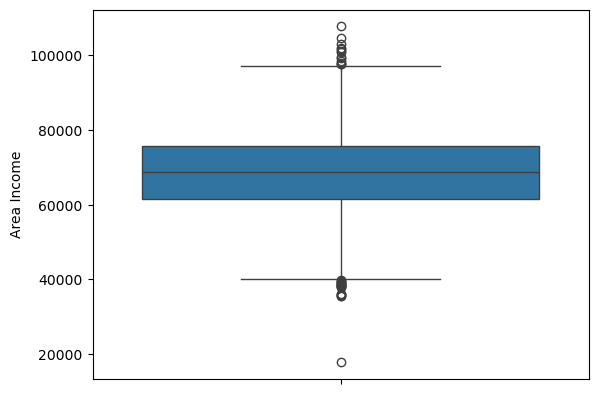

-------------------------House Age-------------------------


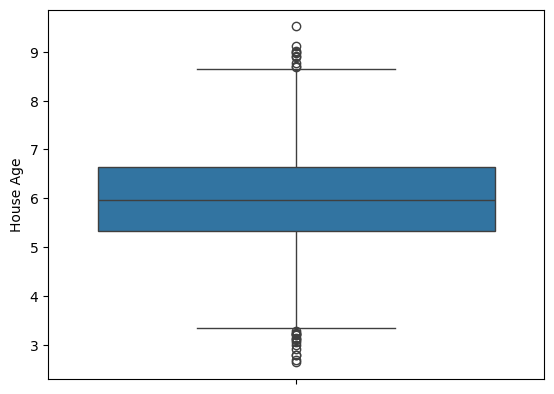

-------------------------Number of Rooms-------------------------


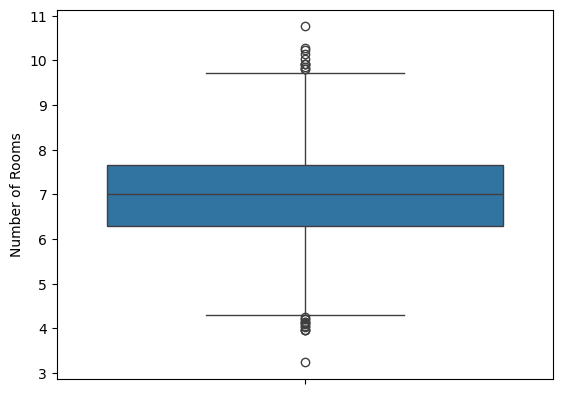

-------------------------Number of Bedrooms-------------------------


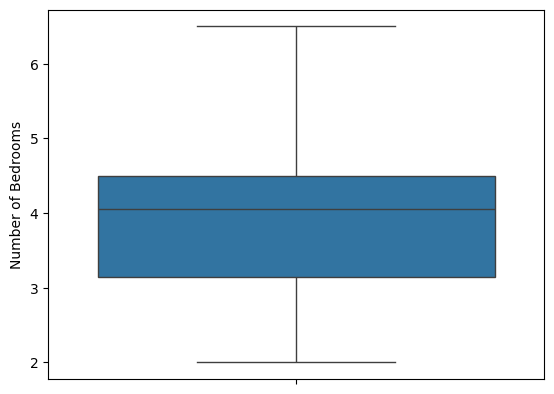

-------------------------Area Population-------------------------


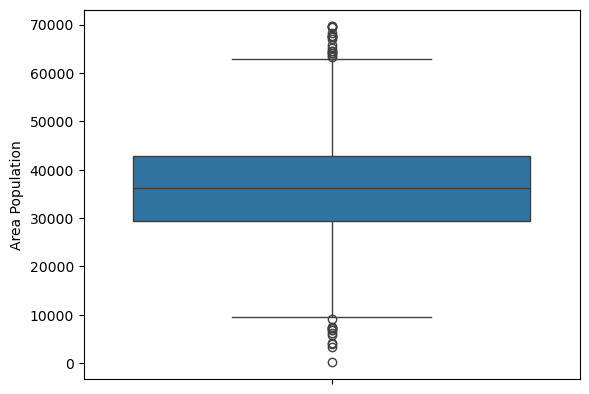

-------------------------Price-------------------------


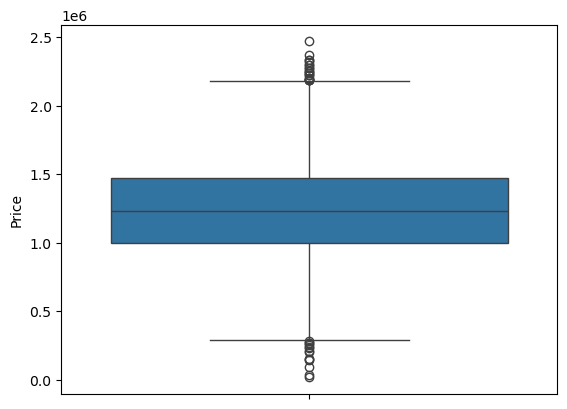

In [136]:
for i in df.columns:
    if i == 'Address':
        continue
    else:
        print(f'-------------------------{i}-------------------------')
        sns.boxplot(df[i])
        plt.show()

# Feature Encoding

In [198]:
df.head()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [199]:
df.Address.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Address'

In [139]:
del df['Address']

In [140]:
df.head()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## Using IQR

In [141]:
# df.drop(['Address'], axis=1)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
IQR

Area Income            14302.776278
House Age                  1.328525
Number of Rooms            1.366621
Number of Bedrooms         1.350000
Area Population        13457.362067
Price                 473633.069163
dtype: float64

In [142]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [143]:
lower_limit

Area Income            40026.397972
House Age                  3.329495
Number of Rooms            4.249318
Number of Bedrooms         1.115000
Area Population         9217.885601
Price                 287127.531305
dtype: float64

In [144]:
upper_limit

Area Income           9.723750e+04
House Age             8.643597e+00
Number of Rooms       9.715803e+00
Number of Bedrooms    6.515000e+00
Area Population       6.304733e+04
Price                 2.181660e+06
dtype: float64

In [145]:
df.shape

(5000, 6)

In [146]:
df[((df < lower_limit) | (df > upper_limit)).any(axis=1)]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06
28,90499.057451,6.384359,4.242191,3.04,33970.164990,1.240764e+06
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05
90,48904.983269,4.844973,5.448956,3.38,32960.753070,2.018981e+05
228,66574.709994,5.550265,6.844150,2.17,69575.449464,1.702406e+06
...,...,...,...,...,...,...
4803,61846.135900,5.057578,7.681141,3.39,69621.713378,1.504316e+06
4844,37908.675863,6.233813,7.252916,6.07,39632.079786,8.804028e+05
4855,35797.323122,5.544221,7.795138,5.00,24844.200190,2.998630e+05
4859,73685.403658,8.916093,6.291818,3.05,36000.506028,1.798927e+06


In [147]:
df[((df < lower_limit) | (df > upper_limit)).any(axis=1)].index

Index([  12,   28,   39,   90,  228,  256,  263,  314,  353,  355,
       ...
       4565, 4684, 4716, 4744, 4777, 4803, 4844, 4855, 4859, 4978],
      dtype='int64', length=135)

In [148]:
ind = df[((df < lower_limit) | (df > upper_limit)).any(axis=1)].index

for i in ind:
    print(i)

12
28
39
90
228
256
263
314
353
355
411
465
496
558
622
693
696
715
844
847
901
918
924
962
990
1074
1091
1096
1110
1208
1234
1248
1271
1285
1356
1361
1423
1459
1485
1494
1516
1530
1531
1536
1578
1595
1597
1628
1661
1726
1734
1757
1777
1799
1855
1859
1891
1965
2025
2066
2092
2108
2173
2242
2300
2366
2380
2392
2422
2432
2465
2503
2534
2538
2597
2603
2676
2719
2756
2771
2795
2829
2839
2898
2963
3039
3069
3091
3120
3134
3138
3144
3183
3212
3336
3387
3388
3442
3466
3483
3502
3540
3541
3600
3798
3803
3806
3831
3855
3922
3989
3991
4087
4129
4182
4290
4318
4324
4400
4412
4429
4449
4451
4488
4491
4565
4684
4716
4744
4777
4803
4844
4855
4859
4978


In [149]:
df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]

In [150]:
df

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [153]:
df.shape

(4865, 6)

# Multi-Collinearity

In [154]:
d = df.drop(columns=['Price'])
d

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [155]:
d.corr()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097
House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151
Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244
Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000


<Axes: >

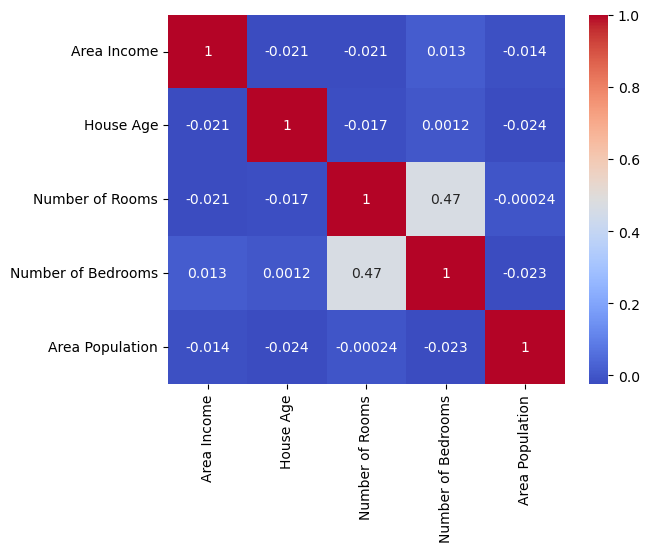

In [156]:
sns.heatmap(d.corr(), annot=True, cmap='coolwarm')

# Feature Selection

In [157]:
df.corr()['Price']

Area Income           0.632031
House Age             0.441675
Number of Rooms       0.329630
Number of Bedrooms    0.168606
Area Population       0.406027
Price                 1.000000
Name: Price, dtype: float64

In [158]:
df

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Model Building

In [159]:
df

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Separate Independent and Dependent data

In [160]:
df.columns

Index(['Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price'],
      dtype='object')

In [161]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

In [162]:
X

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [163]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4865, dtype: float64

# Split data into training and test

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
X_train

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599
184,82906.654801,5.901452,5.767366,4.26,38820.481944
4526,69664.075765,7.612180,5.945619,2.00,37012.993434
...,...,...,...,...,...
4551,79500.398946,8.554884,6.160048,3.29,32069.117413
478,62685.270752,6.057649,6.766130,2.17,42018.938568
3185,66469.369473,4.663863,6.117542,4.13,22670.608616
3881,59084.725195,7.086564,6.144059,2.11,42955.908360


In [166]:
X_test

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516
2166,65013.212446,7.321305,7.591328,3.13,23039.889474
4874,67794.294771,8.104891,6.211783,2.45,25903.809477
...,...,...,...,...,...
1520,69882.273926,5.646558,5.647646,4.35,19544.751964
2610,55421.168887,8.223912,7.526952,3.07,30995.209936
2089,77033.913592,4.079782,8.441009,6.26,26160.161047
2331,79817.665761,6.019475,8.073787,5.41,31765.901385


In [167]:
y_train

2363    1.107160e+06
1887    9.782413e+05
3633    1.404036e+06
184     1.454943e+06
4526    1.074647e+06
            ...     
4551    1.727983e+06
478     1.025461e+06
3185    4.122692e+05
3881    1.073254e+06
880     1.967637e+06
Name: Price, Length: 3892, dtype: float64

In [168]:
y_test

2250    1.300479e+06
4583    1.053485e+06
2729    1.009769e+06
2166    1.131041e+06
4874    1.343395e+06
            ...     
1520    7.268839e+05
2610    1.403176e+06
2089    1.025418e+06
2331    1.428399e+06
4275    1.754866e+06
Name: Price, Length: 973, dtype: float64

In [169]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3892, 5), (973, 5), (3892,), (973,))

# Model Selection

## Using Linear Regression

In [170]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [171]:
print(f'Training Accuracy : {round(lr.score(X_train, y_train), 2)*100}%')
print(f'Test Accuracy :ccccccccc {round(lr.score(X_test, y_test), 2)*100}%')

Training Accuracy : 91.0%
Test Accuracy :ccccccccc 91.0%


## Using KNN

In [172]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [173]:
print(f'Training Accuracy : {round(knn.score(X_train, y_train), 2)*100}%')
print(f'Test Accuracy : {round(knn.score(X_test, y_test), 2)*100}%')

Training Accuracy : 61.0%
Test Accuracy : 53.0%


## Decision Tree Regressor

In [174]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [175]:
print(f'Training Accuracy : {round(tree.score(X_train, y_train), 2)*100}%')
print(f'Test Accuracy : {round(tree.score(X_test, y_test), 2)*100}%')

Training Accuracy : 95.0%
Test Accuracy : 78.0%


# Final Model Training - Linear Regression

In [176]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [177]:
lr.coef_

array([2.15590620e+01, 1.65958273e+05, 1.19758233e+05, 1.06755714e+03,
       1.49866650e+01])

In [178]:
X.columns

Index(['Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population'],
      dtype='object')

In [179]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficients/Slope'])

,Coefficients/Slope
Area Income,21.559062
House Age,165958.272744
Number of Rooms,119758.232952
Number of Bedrooms,1067.557140
Area Population,14.986665


# Model Prediction

In [180]:
lr

LinearRegression()

In [181]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [182]:
X_train[:5]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599
184,82906.654801,5.901452,5.767366,4.26,38820.481944
4526,69664.075765,7.612180,5.945619,2.00,37012.993434


In [183]:
y_train[:5]

2363    1.107160e+06
1887    9.782413e+05
3633    1.404036e+06
184     1.454943e+06
4526    1.074647e+06
Name: Price, dtype: float64

In [184]:
y_train_pred[:5]

array([1266013.93072291, 1026729.25636162, 1443436.66594478,
       1421785.33323291, 1412043.61994085])

In [185]:
X_test[:5]

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516
2166,65013.212446,7.321305,7.591328,3.13,23039.889474
4874,67794.294771,8.104891,6.211783,2.45,25903.809477


In [186]:
y_test[:5]

2250    1.300479e+06
4583    1.053485e+06
2729    1.009769e+06
2166    1.131041e+06
4874    1.343395e+06
Name: Price, dtype: float64

In [187]:
y_test_pred[:5]

array([1300879.08720861, 1045725.77688449,  969081.69718645,
       1252385.57664906, 1319368.49902547])

# Model Evaluation

In [188]:
# Training Evaluation

mean_squared_error(y_train, y_train_pred)

10083105986.347572

In [189]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

100414.67017496782

In [190]:
r2_score(y_train, y_train_pred)

0.911537564238988

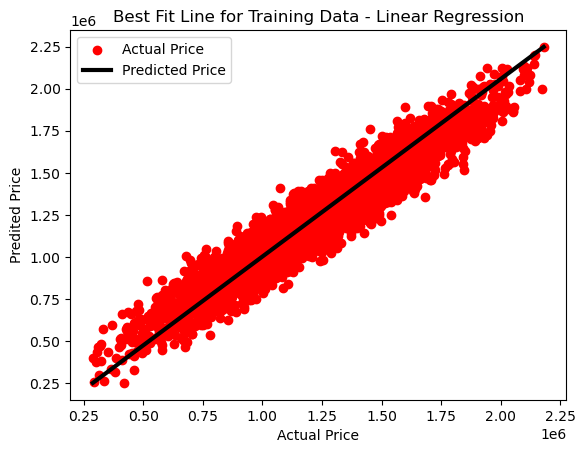

In [191]:
a = [y_train.min(), y_train.max()]
b = [y_train_pred.min(), y_train_pred.max()]

plt.scatter(y_train, y_train_pred, color='r', label='Actual Price')
plt.plot(a, b, color='k', lw=3, label='Predicted Price')
plt.title('Best Fit Line for Training Data - Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predited Price')
plt.legend()
plt.show()

In [192]:
y_train.min()

288708.9121479006

In [193]:
y_train.max()

2180065.597738638

In [194]:
y_train_pred.min()

251771.94318837626

In [195]:
y_train_pred.max()

2247737.458401235

MSE      : 10083105986.347572
RMSE     : 100414.67017496782
MAE      : 80921.16373101527
R2_Score : 0.911537564238988


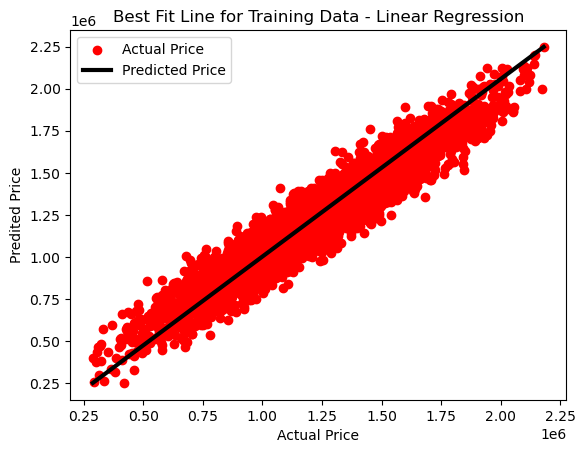

In [196]:
# Training Evaluation

def training_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted) 
    rmse = np.sqrt(mean_squared_error(actual, predicted))       
    mae = mean_absolute_error(actual, predicted)        
    r2 = r2_score(actual, predicted)     
    
    print(f'MSE      : {mse}')
    print(f'RMSE     : {rmse}')    
    print(f'MAE      : {mae}')    
    print(f'R2_Score : {r2}')    
    
    plt.scatter(actual, predicted, color='r', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [predicted.min(), predicted.max()], color='k', lw=3, label='Predicted Price')
    plt.title('Best Fit Line for Training Data - Linear Regression')
    plt.xlabel('Actual Price')
    plt.ylabel('Predited Price')
    plt.legend()
    plt.show()


training_evaluation(y_train, y_train_pred)

MSE      : 10295321311.369013
RMSE     : 101465.86278827483
MAE      : 81137.45704516847
R2_Score : 0.9126986629438489


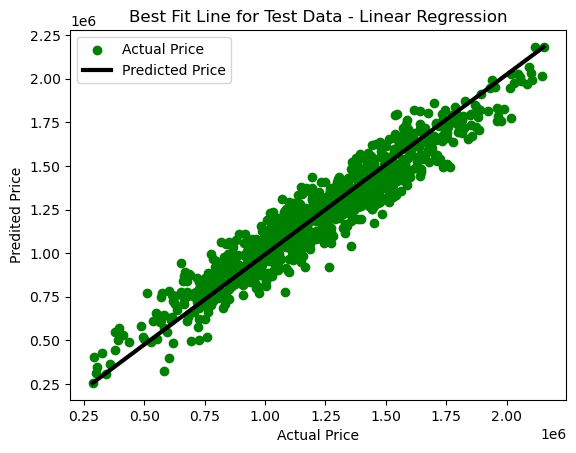

In [197]:
# Test Evaluation

def test_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted) 
    rmse = np.sqrt(mean_squared_error(actual, predicted))       
    mae = mean_absolute_error(actual, predicted)        
    r2 = r2_score(actual, predicted)     
    
    print(f'MSE      : {mse}')
    print(f'RMSE     : {rmse}')    
    print(f'MAE      : {mae}')    
    print(f'R2_Score : {r2}')    
    
    plt.scatter(actual, predicted, color='g', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [predicted.min(), predicted.max()], color='k', lw=3, label='Predicted Price')
    plt.title('Best Fit Line for Test Data - Linear Regression')
    plt.xlabel('Actual Price')
    plt.ylabel('Predited Price')
    plt.legend()
    plt.show()


test_evaluation(y_test, y_test_pred)